<a href="https://colab.research.google.com/github/robgon-art/ai8ball/blob/main/AI_8_Ball_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder-large/5 loaded


In [ ]:
yes_answers = [              
  "It is certain.",
  "It is decidedly so.",
  "Without a doubt.",
  "Yes – definitely.",
  "You may rely on it.",
  "As I see it, yes.",
  "Most likely.",
  "Outlook good.",
  "Yes",
  "Signs point to yes."
]

maybe_answers = [
  "Reply hazy, try again.",
  "Ask again later.",
  "Better not tell you now.",
  "Cannot predict now.",
  "Concentrate and ask again."
]

no_answers = [
  "Don't count on it.",
  "My reply is no.",
  "My sources say no.",
  "Outlook not so good.",
  "Very doubtful."
]

In [ ]:
answers = yes_answers + maybe_answers + no_answers
all_answers = []
for y in yes_answers:
  all_answers += ["Affirmative. " + y]
for m in maybe_answers:
  all_answers += ["Maybe. " + m]
for n in no_answers:
  all_answers += ["Negative. " + n]
colors = ["#80ff80"] * len(yes_answers) +  ["#f0f080"] * len(maybe_answers) + ["#ff8080"] * len(no_answers)

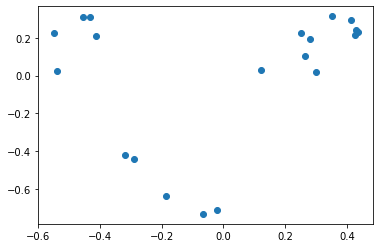

In [ ]:
import math
def rotate(xy, radians):
    x, y = xy
    c, s = np.cos(radians), np.sin(radians)
    j = np.matrix([[c, s], [-s, c]])
    m = np.asarray(np.dot(j, [x, y]))
    return m

def flip(xy):
  x, y = xy
  m = [-x, y]
  return m

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(embed(all_answers))
t = reduced.transpose()
t = rotate(t, math.pi*0.25)
t = flip(t)

x, y = t

plt.scatter(x, y)
plt.show()

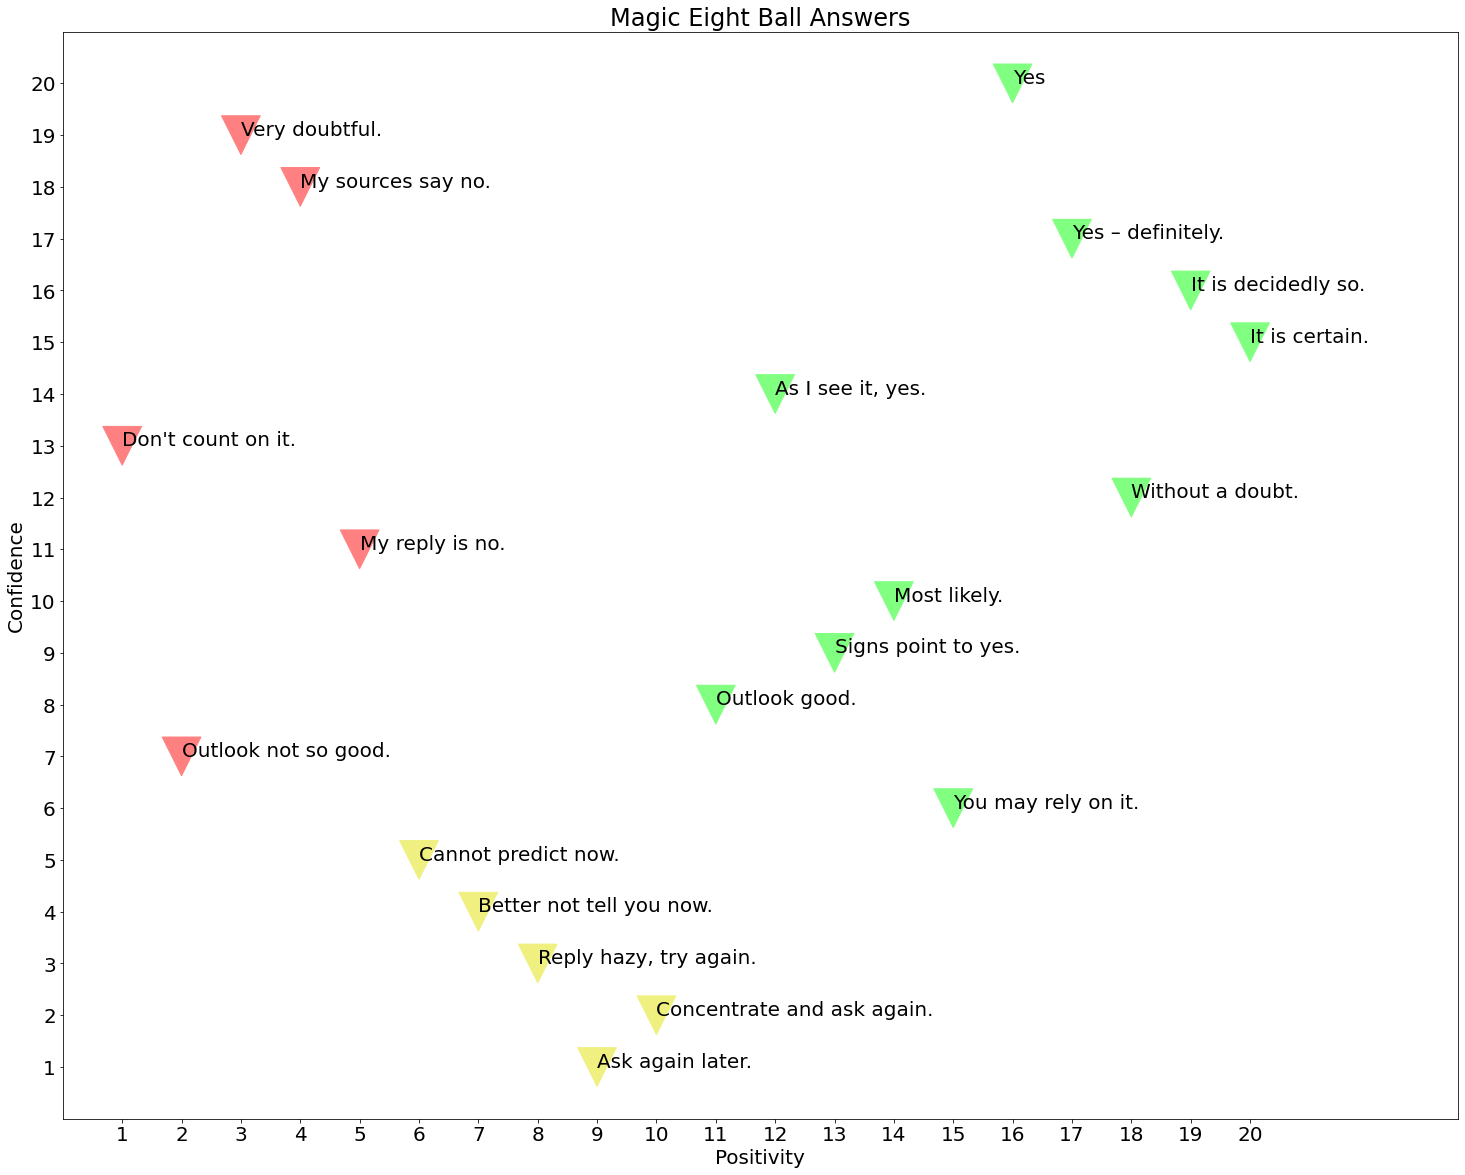

In [ ]:
#@title
import math
def rotate(xy, radians):
    x, y = xy
    c, s = np.cos(radians), np.sin(radians)
    j = np.matrix([[c, s], [-s, c]])
    m = np.asarray(np.dot(j, [x, y]))
    return m

def flip(xy):
  x, y = xy
  m = [-x, y]
  return m

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(embed(all_answers))
t = reduced.transpose()
t = rotate(t, math.pi*0.25)
t = flip(t)

dict = {}
for i, a in enumerate(answers):
  c = [t[0][i], t[1][i], colors[i]]
  dict[a] = c
# print(dict)

sorted_dict = sorted(dict.items(), key=lambda x: x[1][0])
for i, s in enumerate(sorted_dict):
  key = s[0]
  sorted_dict[i] = (s[0], [i+1, s[1][1]], s[1][2])
sorted_dict = sorted(sorted_dict, key=lambda x: x[1][1])
# print(sorted_dict)

for i, s in enumerate(sorted_dict):
  key = s[0]
  sorted_dict[i] = (s[0], [s[1][0], i+1], s[2])
# print(sorted_dict)

an = []
xc = []
yc = []
co = []

for s in sorted_dict:
  # print(s[1][1])
  an.append(s[0])
  xc.append(s[1][0])
  yc.append(s[1][1])
  co.append(s[2])

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(25, 20))
ax.set_xticks(np.arange(1, 21, 1))
ax.set_yticks(np.arange(1, 21, 1))
plt.xlim(0, 23.5)
plt.ylim(0, 21)
plt.title("Magic Eight Ball Answers")
plt.xlabel("Positivity")
plt.ylabel("Confidence")
_ = ax.scatter(xc, yc, 1500, co, marker="v")

answers = []
for a, x, y in zip(an, xc, yc):
  ax.annotate(a, (x, y))
  answers.append((a, (x, y)))


In [ ]:
print(answers)
import pickle
pickle.dump(answers, open("answers.pkl", "wb"))